# Customer Segmentation Project
### Project Objective: - Identify customer segments and provide actionable insights for developing targeted marketing strategies

## Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [ ]:
df = pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### Understanding the features:

#### People
##### 1. ID: Customer's unique identifier
##### 2. Year_Birth: Customer's birth year
##### 3. Education: Customer's education level
##### 4. Marital_Status: Customer's marital status
##### 5. Income: Customer's yearly household income
##### 6. Kidhome: Number of children in customer's household
##### 7. Teenhome: Number of teenagers in customer's household
##### 8. Dt_Customer: Date of customer's enrollment with the company
##### 9. Recency: Number of days since customer's last purchase
##### 10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
##### 1. MntWines: Amount spent on wine in last 2 years
##### 2. MntFruits: Amount spent on fruits in last 2 years
##### 3. MntMeatProducts: Amount spent on meat in last 2 years
##### 4. MntFishProducts: Amount spent on fish in last 2 years
##### 5. MntSweetProducts: Amount spent on sweets in last 2 years
##### 6. MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
##### 1. NumDealsPurchases: Number of purchases made with a discount
##### 2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
##### 3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
##### 4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
##### 5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
##### 6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
##### 7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
##### 1. NumWebPurchases: Number of purchases made through the company’s website
##### 2. NumCatalogPurchases: Number of purchases made using a catalogue
##### 3. NumStorePurchases: Number of purchases made directly in stores
##### 4. NumWebVisitsMonth: Number of visits to company’s website in the last month

#### Cost
##### 1. Z_CostContact: Cost associated with contacting a customer during the marketing campaign
##### 2. Z_Revenue: Revenue generated from a customer as a result of the marketing campaign

## Exploratory Data Analysis (EDA)

#### 1. Initial EDA

In [ ]:
# Checking number of rows and columns in the dataset
df.shape

(2240, 29)

In [ ]:
# There are 2240 rows and 29 columns in the dataset

In [ ]:
# Checking null records in the dataset
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# From above, we can see there are 24 missing records in the 'Income' feature. Our dataset consists of 2240 total records.
# 24 records out of total 2240 records is a very small portion of missing data and hence we will simply remove the null records.

df.dropna(inplace=True)

In [ ]:
# Checking if all null values are removed
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Now the dataset is free of any missing values

In [ ]:
# Reset the index after missing records removal
df.reset_index(drop=True, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
# Checking if any duplicate records are present in the dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# We can see that there are no duplicate records in the dataset

In [ ]:
# Checking datatypes of all the features
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


In [ ]:
# From above we can tell that most of the features are either 'Integer' or 'Float' type with few exceptions like
# 'Dt_Customer' as 'datetime' datatype and 'Education' & 'Marital_Status' as 'object' datatype.

In [ ]:
# Let's find out unique values of object datatype features
df['Education'].nunique(), df['Marital_Status'].nunique()

(5, 8)

In [ ]:
# There are 5 unique values for 'Education' and '8' unique values for 'Marital_Status'
# Next step is to find out the counts of each of these unique values

#### 2. Univariate Analysis - Categorical Features

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


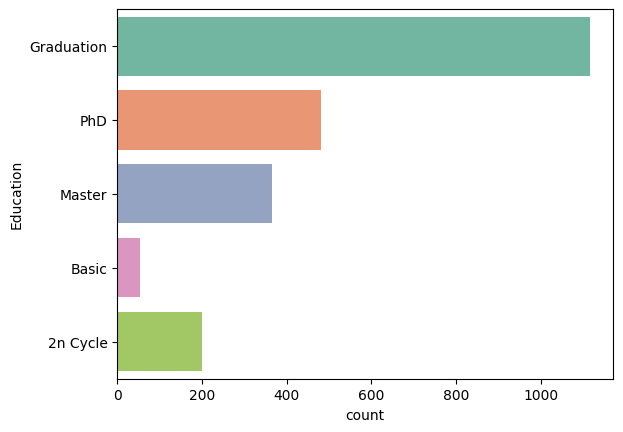

In [ ]:
sns.countplot(df['Education'], palette = 'Set2')
df['Education'].value_counts()

In [ ]:
# We can see from the graph Education levels of different customers, some of which are overlapping in their meaning which
# needs to simplified in feature engineering process.

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


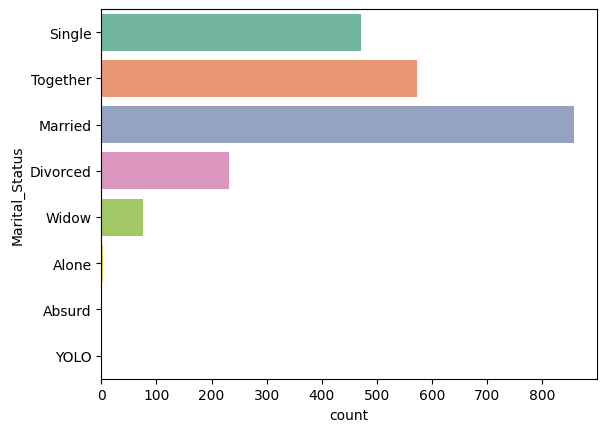

In [ ]:
sns.countplot(df['Marital_Status'], palette = 'Set2')
df['Marital_Status'].value_counts()

In [ ]:
# Similarly, different categories of Marital Status can be clubbed together which are similar in meaning in the context
# of our dataset in feature engineering process

#### 3. Univariate Analysis - Numerical Features

In [ ]:
# Checking Min, Max, Median & Mean Income values
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [ ]:
# Our dataset consists of customers with Maximum Income = $666666.00, Minimum Income = $1730.00, Median Income = $51381.50 & Mean Income = $52247.25

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

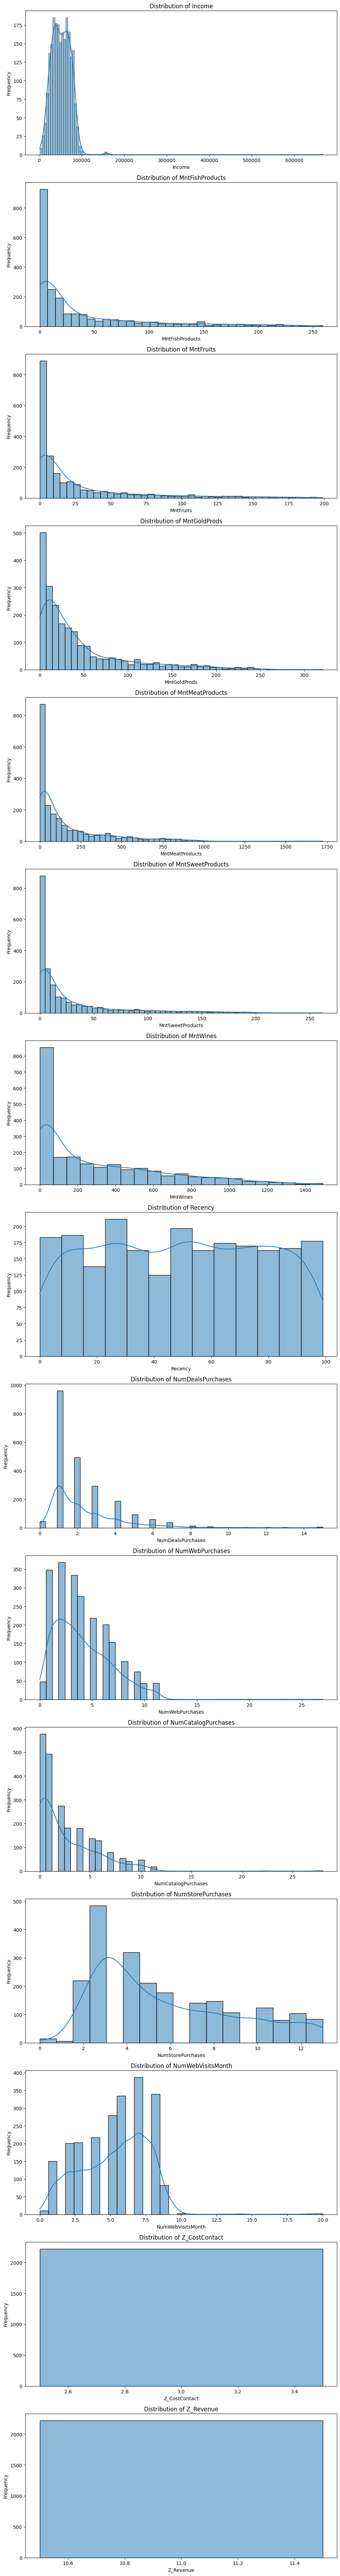

In [ ]:
# Select numerical features for analysis
numerical_features = ['Income', 'MntFishProducts', 'MntFruits',
                     'MntGoldProds', 'MntMeatProducts',
                     'MntSweetProducts', 'MntWines', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

# Create subplots for each numerical feature
fig, axes = plt.subplots(len(numerical_features), 1,figsize=(10, 5 * len(numerical_features)))

# Iterate through numerical features and plot distributions
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
## INFERENCE:

# 1. Distribution of Income shows a slightly positively skewed graph with mean annual income equal to $52,247.25 & median annual income
#    equal to $51,381.50.

# 2. Distribution of all the features showing amount spent on different foods/beverages in last 2 years depict a positively skewed graph,
#    indicating most of the customers spending is in the range $0 - $100 with some customers spending reaching even above $500 specially
#    for Meat Products and Wines.

# 3. Distribution of 'Recency' feature shows a fairly normally distributed graph which indicate there are roughly equal numbers of
#    customers who have purchased more recently than average and those who have purchased less recently than average.

# 4. Distribution of all the features showing number of purchases depict a positively skewed data suggesting that most customers make a
#    relatively small number of purchases and only a few customers make a very large number of purchases.

# 5. Distribution of 'Number of Website Visits per Month' shows a negatively skewed data indicating most customers visit the website
#    frequently but are likely not to make large number of purchases based on the above inference.

# 6. Distribution of 'Z_Revenue' and 'Z_CostContact' features show that they both have very less variance in their values.

#### 4. Bivariate Analysis - Income V/s Amont Spent on various products

,Income,MntFishProducts
Income,1.000000,0.438871
MntFishProducts,0.438871,1.000000


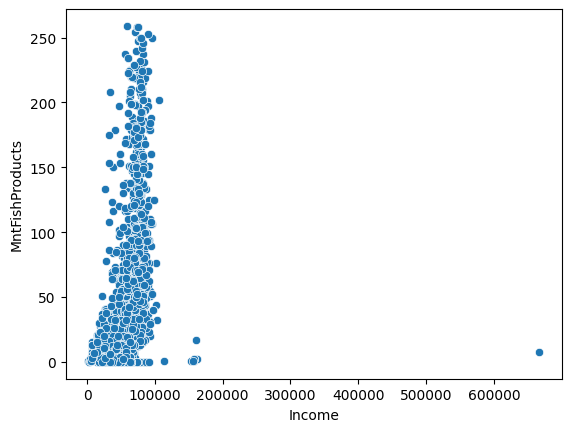

In [ ]:
sns.scatterplot(x='Income', y='MntFishProducts', data=df)
df[['Income','MntFishProducts']].corr()

,Income,MntFruits
Income,1.000000,0.430842
MntFruits,0.430842,1.000000


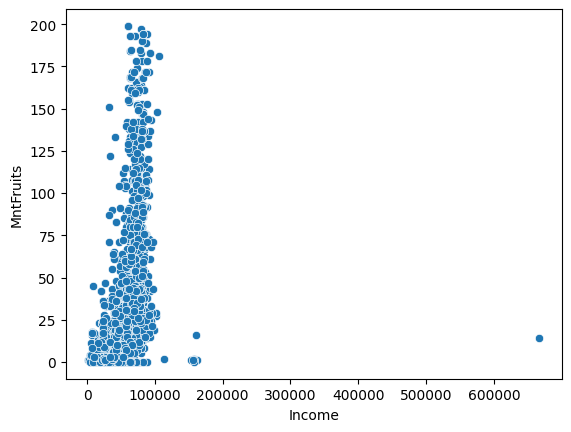

In [ ]:
sns.scatterplot(x='Income', y='MntFruits', data=df)
df[['Income','MntFruits']].corr()

,Income,MntGoldProds
Income,1.000000,0.325916
MntGoldProds,0.325916,1.000000


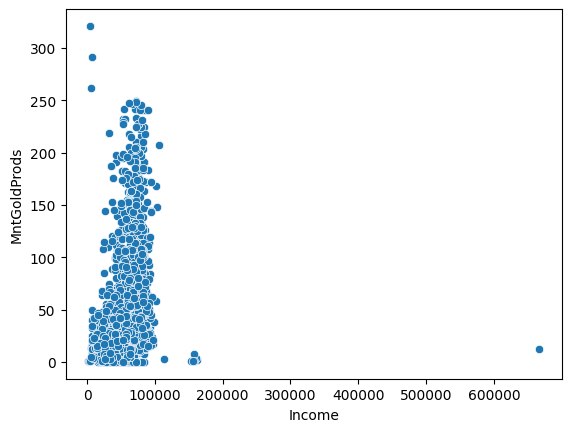

In [ ]:
sns.scatterplot(x='Income', y='MntGoldProds', data=df)
df[['Income','MntGoldProds']].corr()

,Income,MntMeatProducts
Income,1.000000,0.584633
MntMeatProducts,0.584633,1.000000


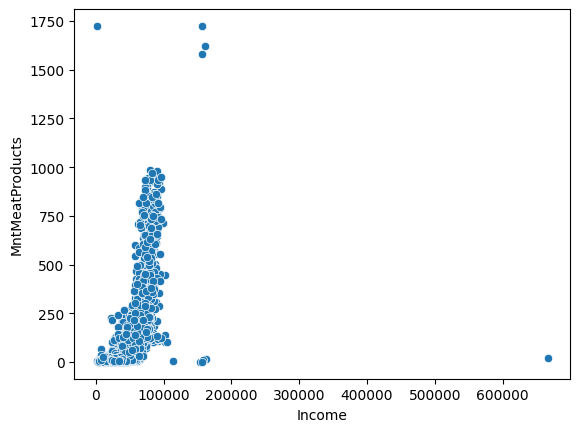

In [ ]:
sns.scatterplot(x='Income', y='MntMeatProducts', data=df)
df[['Income','MntMeatProducts']].corr()

,Income,MntSweetProducts
Income,1.000000,0.440744
MntSweetProducts,0.440744,1.000000


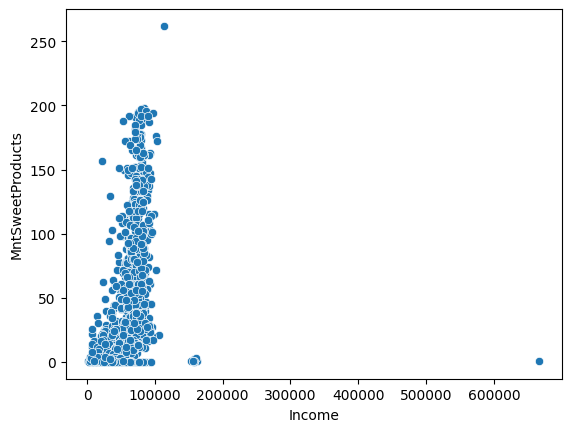

In [ ]:
sns.scatterplot(x='Income', y='MntSweetProducts', data=df)
df[['Income','MntSweetProducts']].corr()

,Income,MntWines
Income,1.00000,0.57865
MntWines,0.57865,1.00000


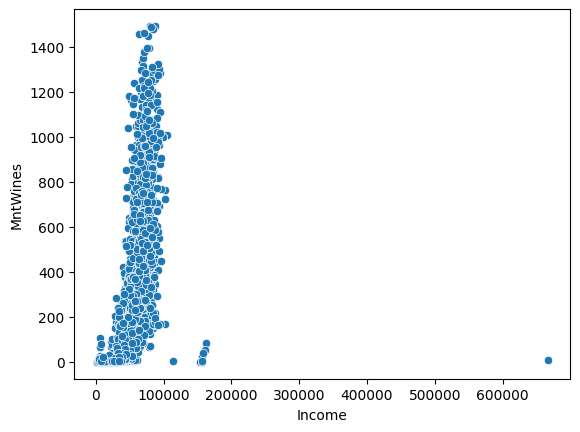

In [ ]:
sns.scatterplot(x='Income', y='MntWines', data=df)
df[['Income','MntWines']].corr()

In [ ]:
# INFERENCE:

# All the scatterplots depicting Income V/s 'Amount spent' on foods/beverages show a very similar pattern, that there is a
# moderate positive correlation of all the 'Amount spent' features with the 'Income' feature, indicating as income increases,
# the tendency for spending on those products increases as well, but the relationship is not extremely strong as the correlation
# indices are close to 0.5 and not exactly +1 or -1.

#### 5. Bivariate Analysis - Income V/s Categorical Features

,Income
Education,
2n Cycle,47633.190000
Basic,20306.259259
Graduation,52720.373656
Master,52917.534247
PhD,56145.313929


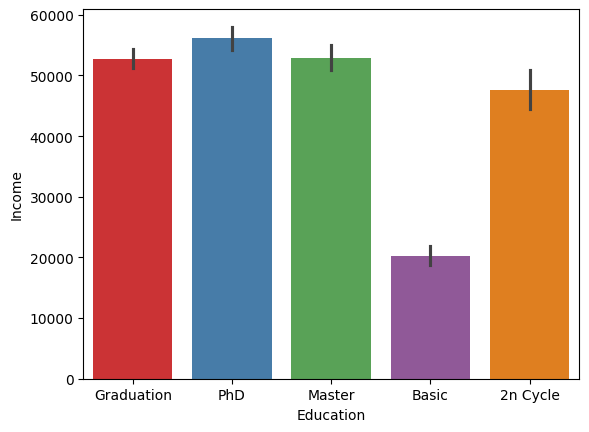

In [ ]:
sns.barplot(x='Education', y='Income', data=df, palette='Set1')
df.groupby('Education')['Income'].mean()

In [ ]:
# INFERENCE:

# From above barplot we can clearly see that the customers with a higher educational qualification have a higher mean income than
# those with a basic educational qualification.

,Income
Marital_Status,
Absurd,72365.500000
Alone,43789.000000
Divorced,52834.228448
Married,51724.978996
Single,50995.350318
Together,53245.534031
Widow,56481.552632
YOLO,48432.000000


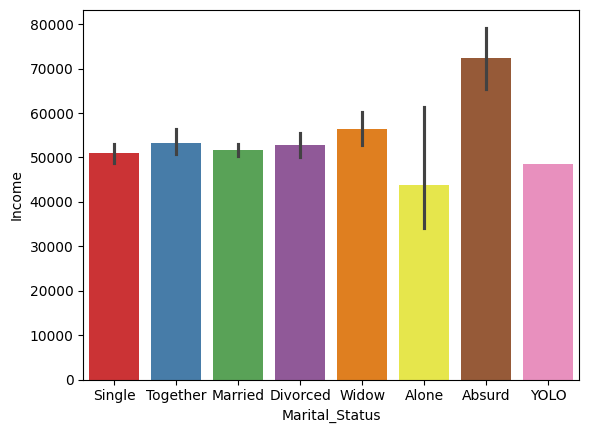

In [ ]:
sns.barplot(x='Marital_Status', y='Income', data=df, palette='Set1')
df.groupby('Marital_Status')['Income'].mean()

In [ ]:
# INFERENCE:

# From above plot we can tell that 'Absurd' & 'Widow' marital status categories show a higher mean income than the other categories.

#### 6. Bivariate Analysis - Categorical V/s Categorical

In [ ]:
pd.crosstab(df['Education'], df['Marital_Status'])

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,0,0,23,80,36,56,5,0
Basic,0,0,1,20,18,14,1,0
Graduation,1,1,119,429,246,285,35,0
Master,1,1,37,138,75,102,11,0
PhD,0,1,52,190,96,116,24,2


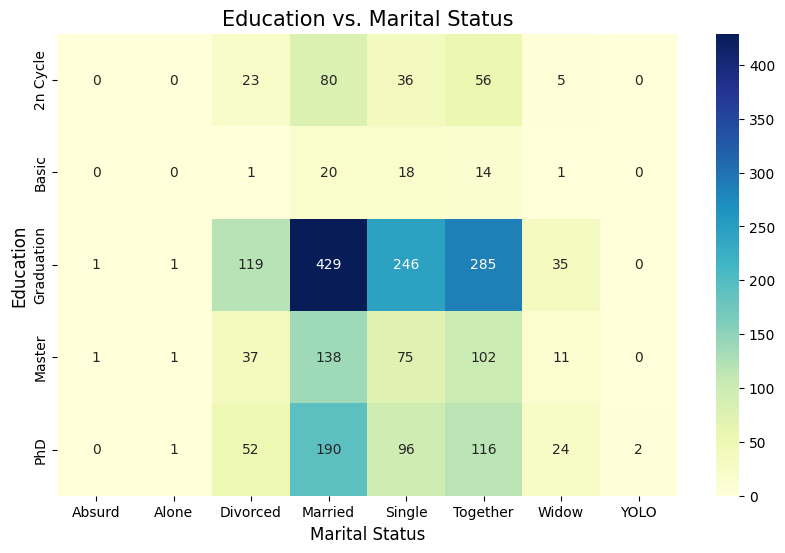

In [ ]:
# Create a heatmap using seaborn
crosstab_table = pd.crosstab(df['Education'], df['Marital_Status'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Education vs. Marital Status", size = 15)
plt.xlabel("Marital Status", size = 12)
plt.ylabel("Education", size = 12)
plt.show()

In [ ]:
# INFERENCE:

# 1. Graduation is the most common education level across all marital statuses.

# 2. 'Married' and 'Together' are the most common marital statuses, particularly for those with higher educational degrees, suggesting these
#    customer bases are more prevelant.

# 3. Certain marital status categories like 'Absurd', 'Alone' & 'YOLO' are very infrequent and could be grouped together with a similar meaning
#    and more frequent categories like 'Single' and/or 'Widow' in the feature engineering process.

#### 7. Outlier Detection

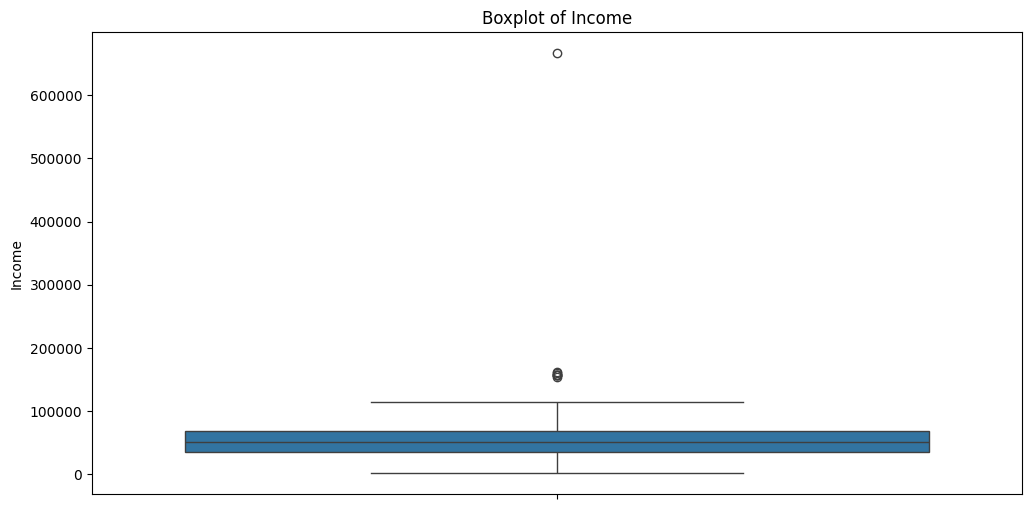

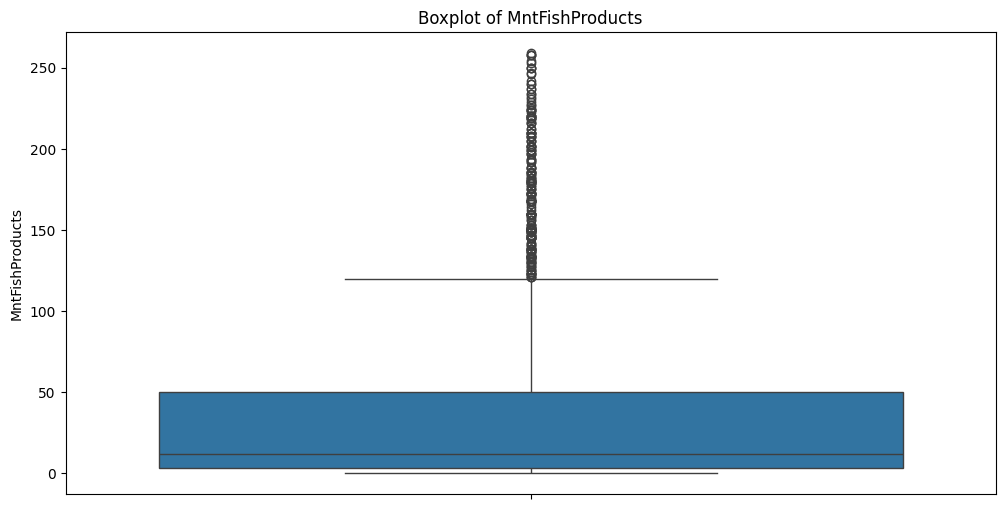

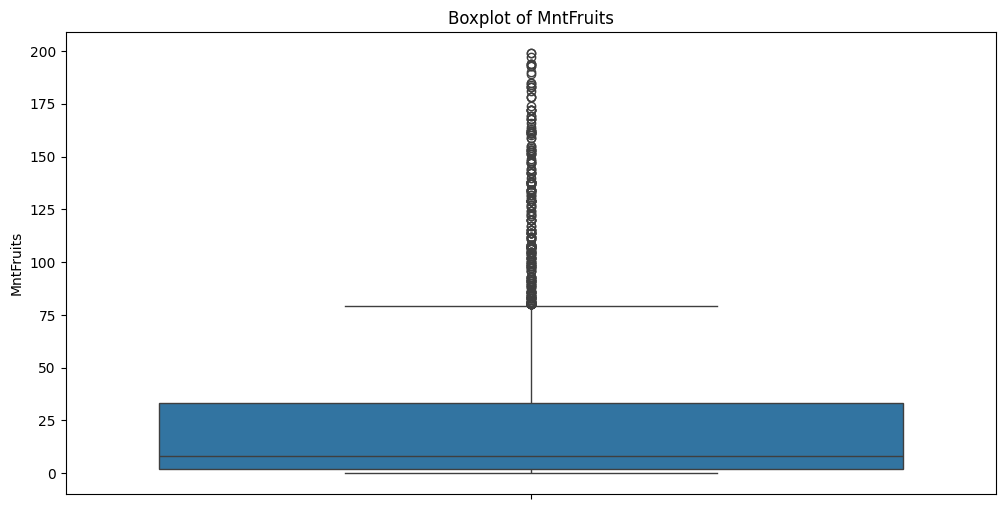

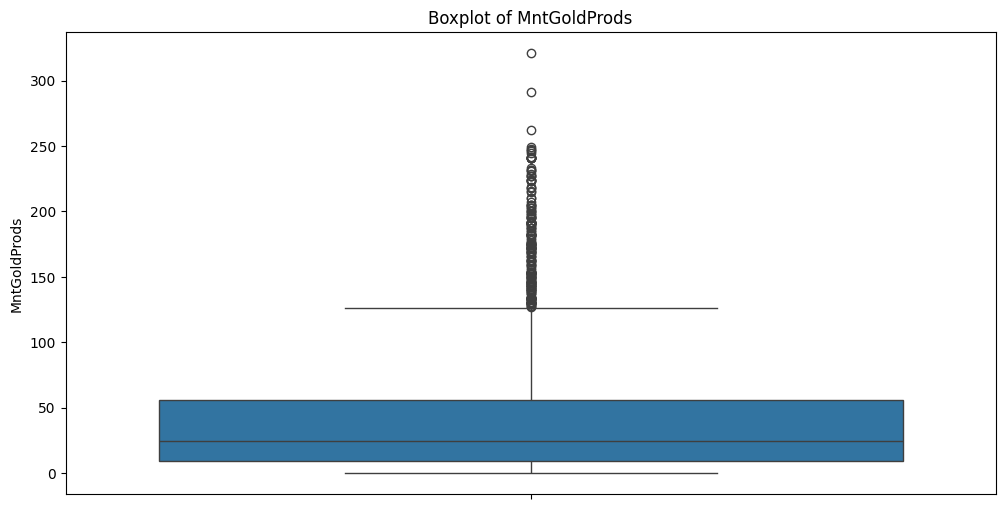

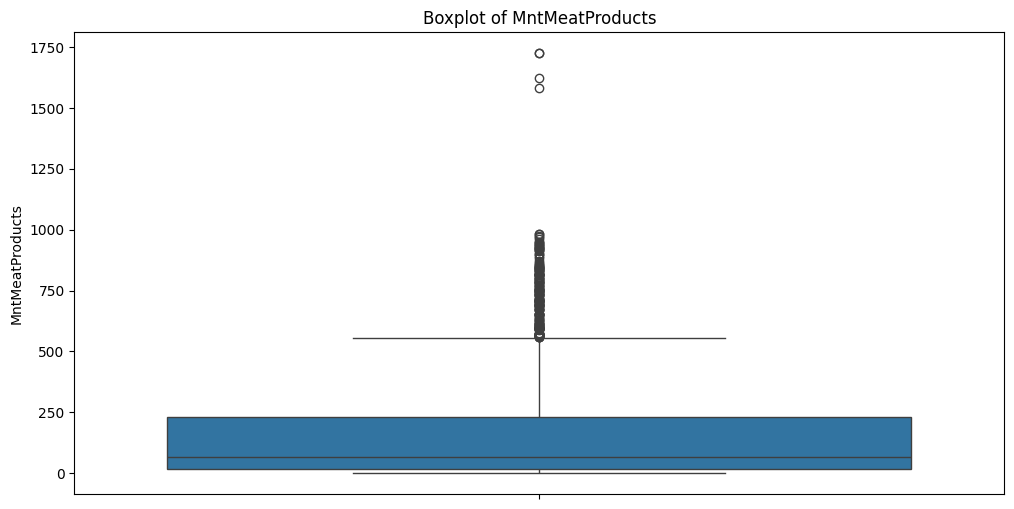

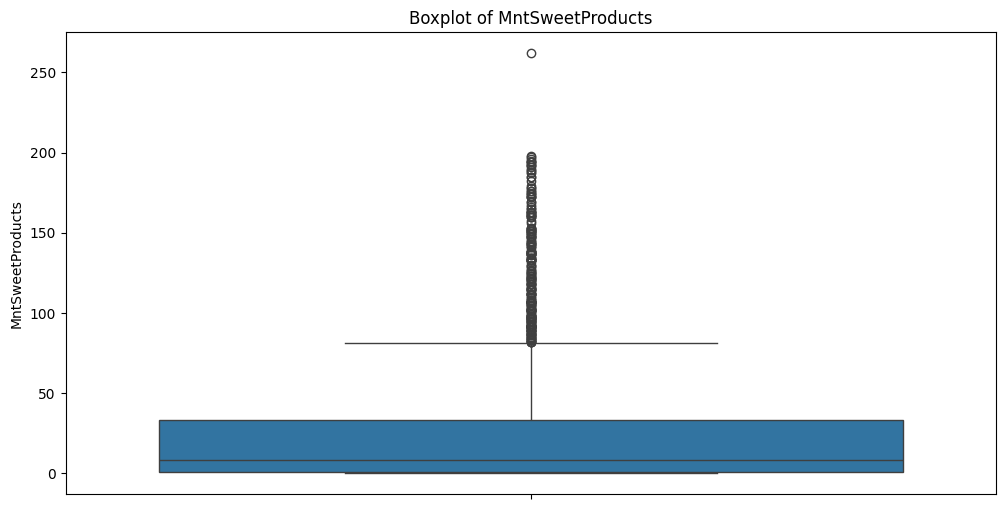

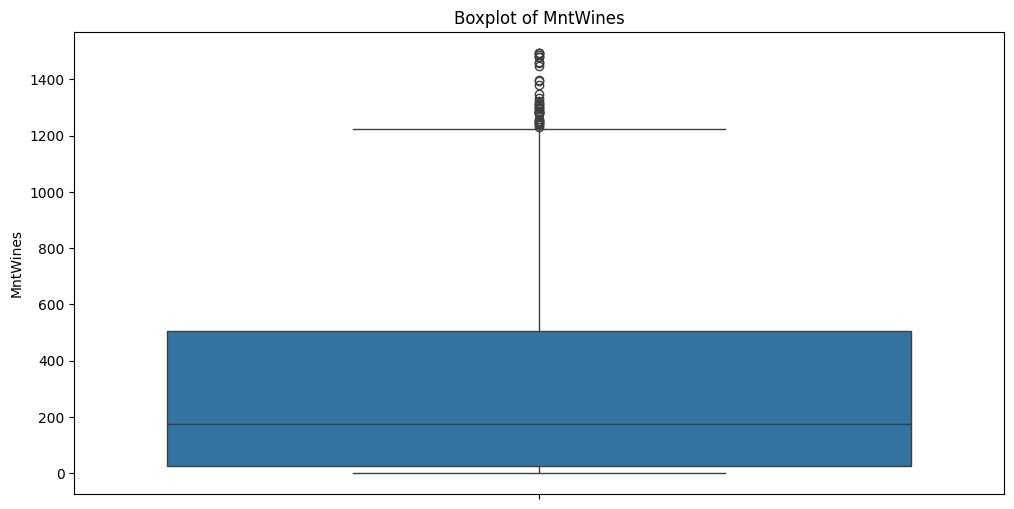

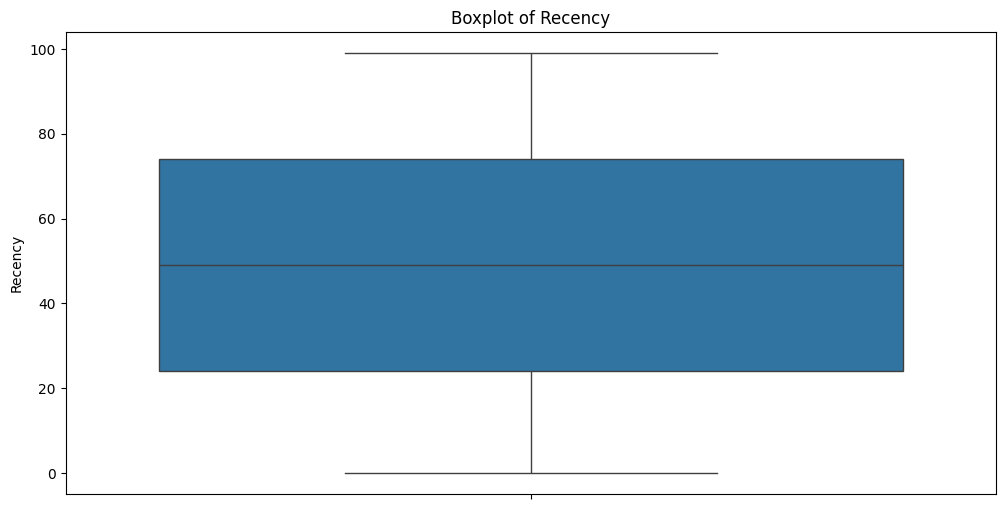

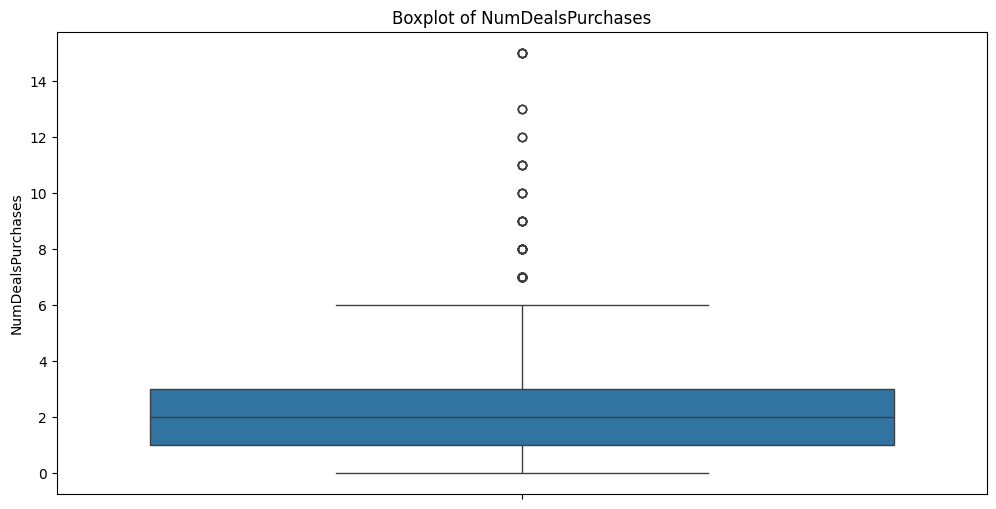

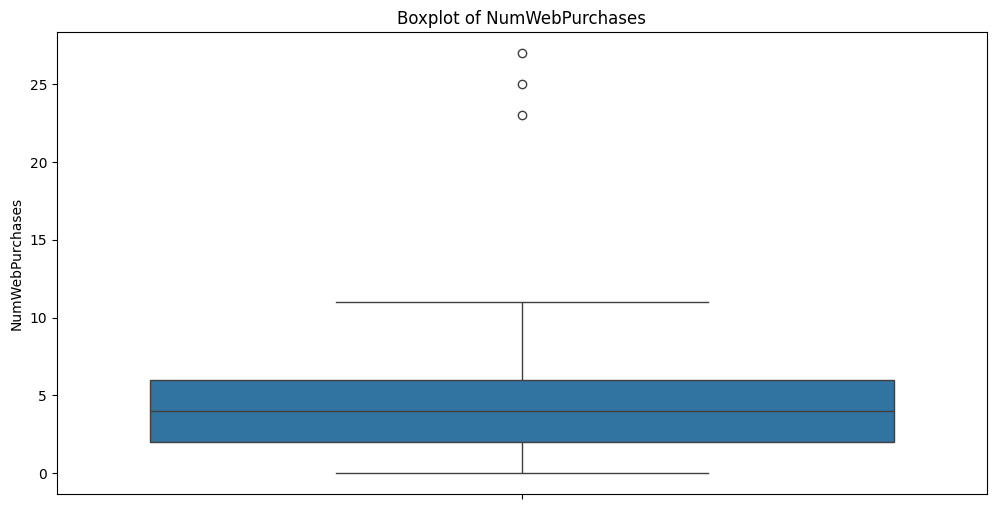

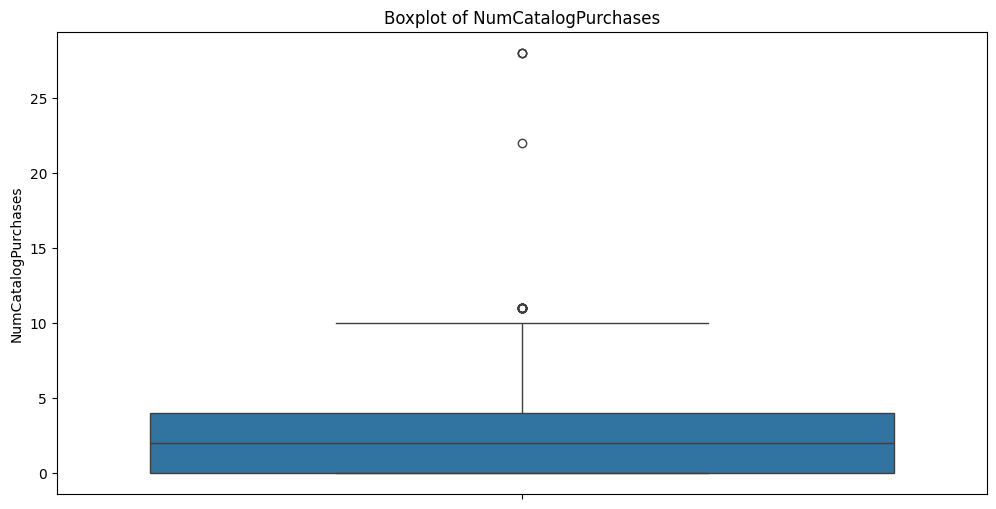

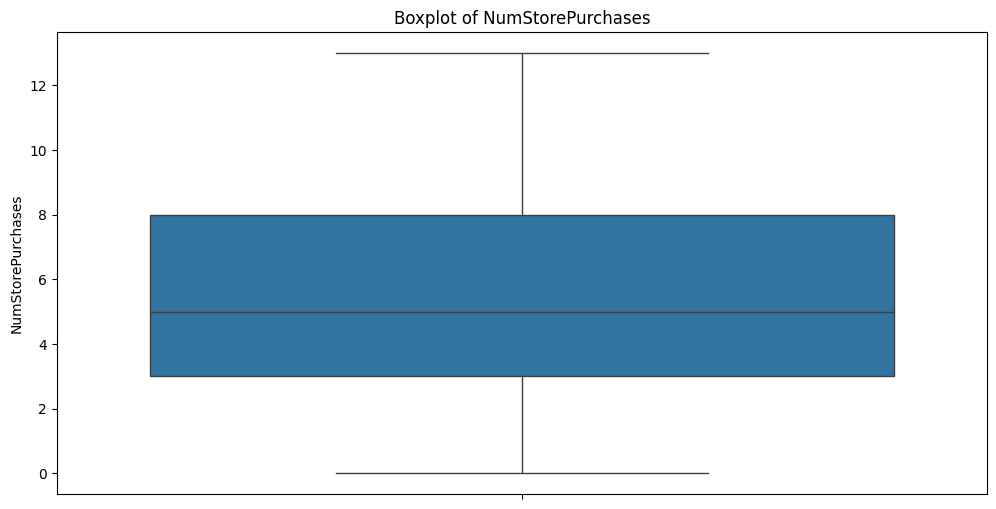

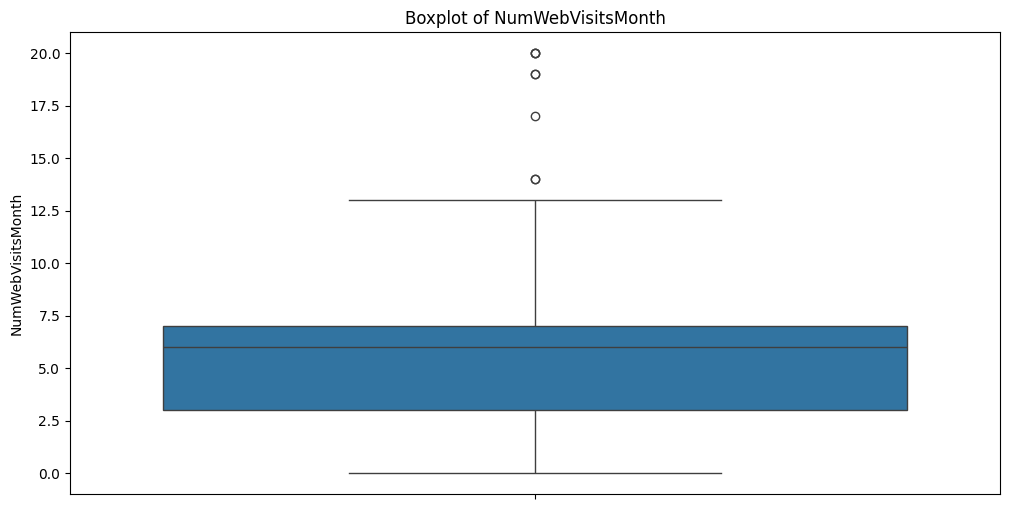

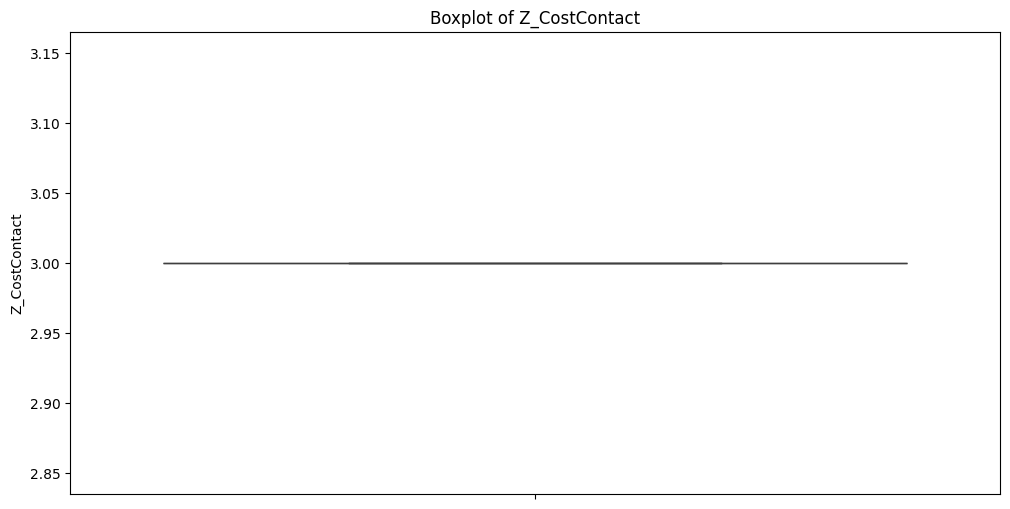

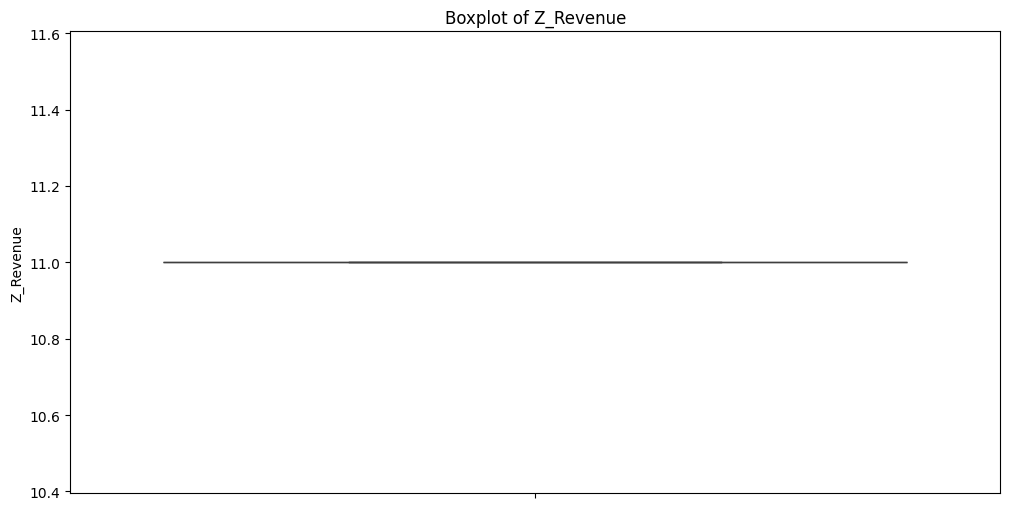

In [ ]:
for feature in numerical_features:
  plt.figure(figsize=(12,6))
  sns.boxplot(df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [ ]:
# Calculate IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()

print(num_outliers)

708


In [ ]:
# We can see we have significant count of outliers (708) out of total records (2216). Therefore, we will treat the outliers using IQR method,
# where we iterate through each numerical feature and replace any values outside the bounds with the corresponding bound value. \
# This essentially "caps" the values at the acceptable range.

In [ ]:
# Treating outliers using IQR

for feature in numerical_features:
  df[feature] = np.where(df[feature] < lower_bound[feature], lower_bound[feature], df[feature])
  df[feature] = np.where(df[feature] > upper_bound[feature], upper_bound[feature], df[feature])

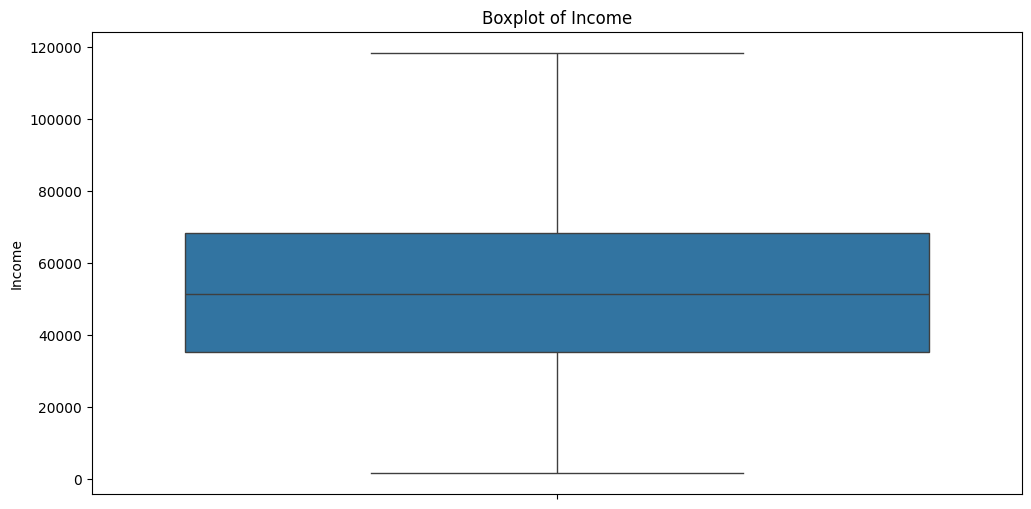

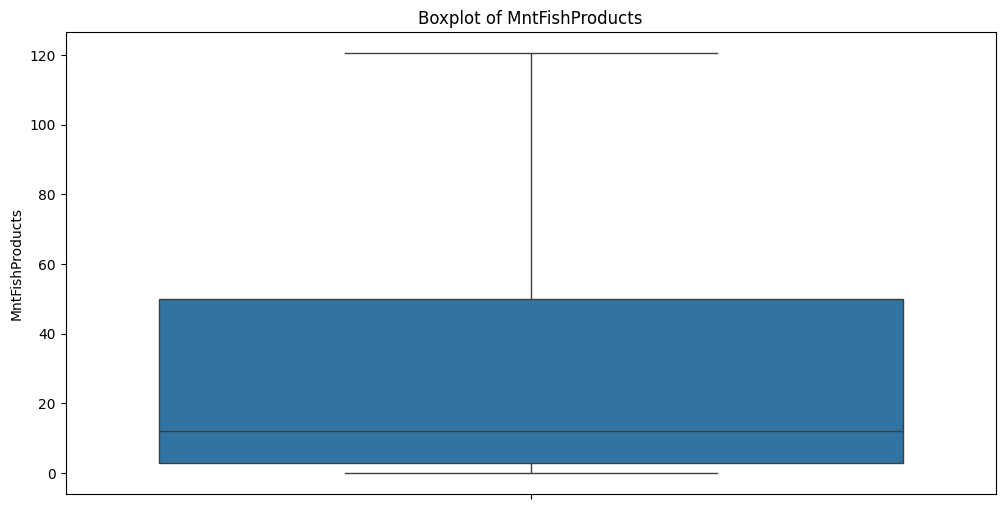

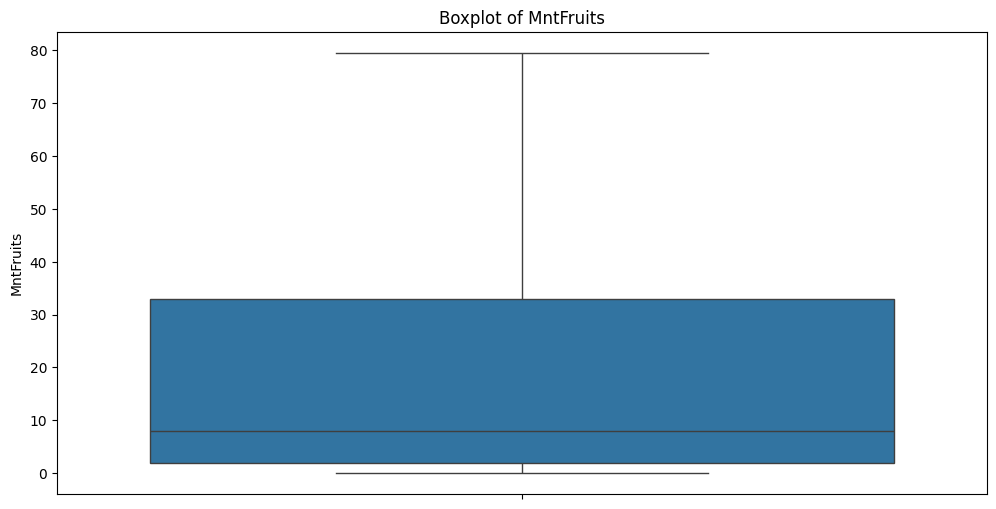

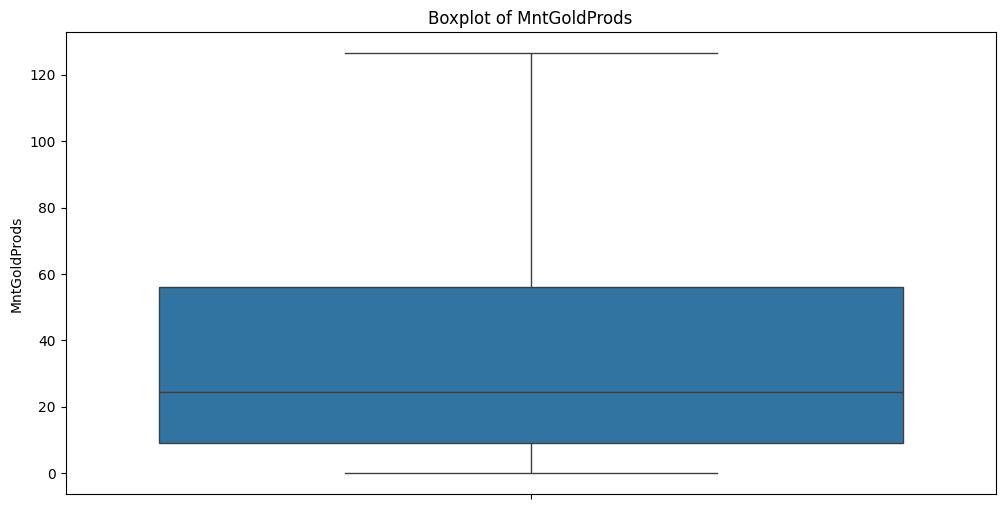

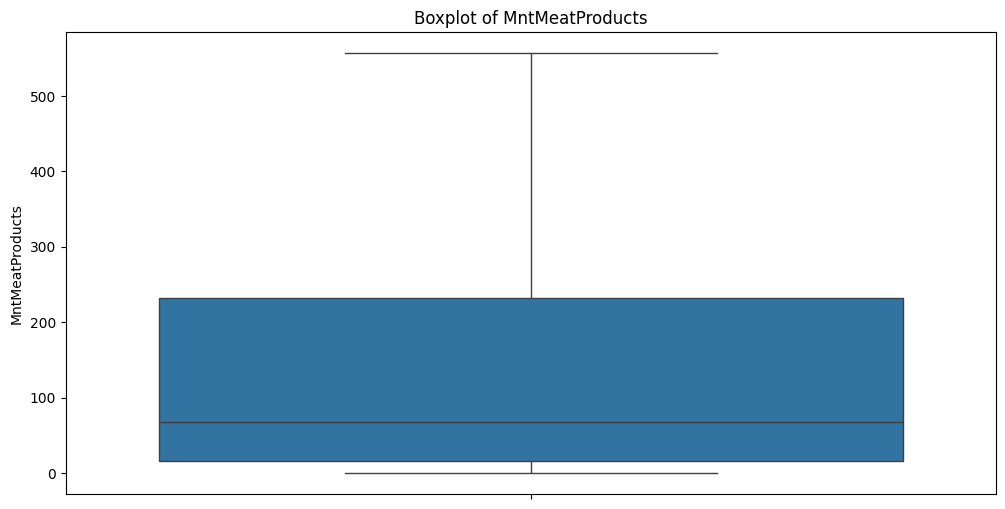

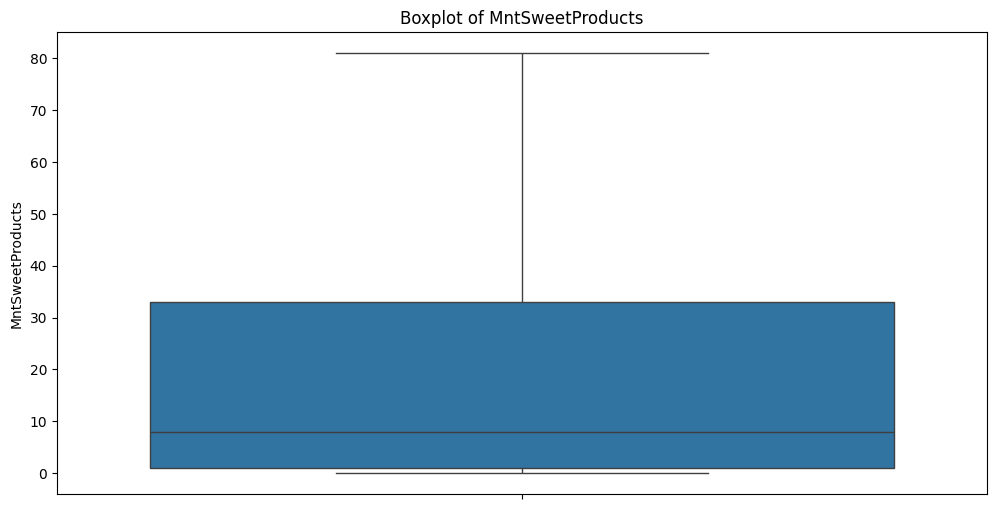

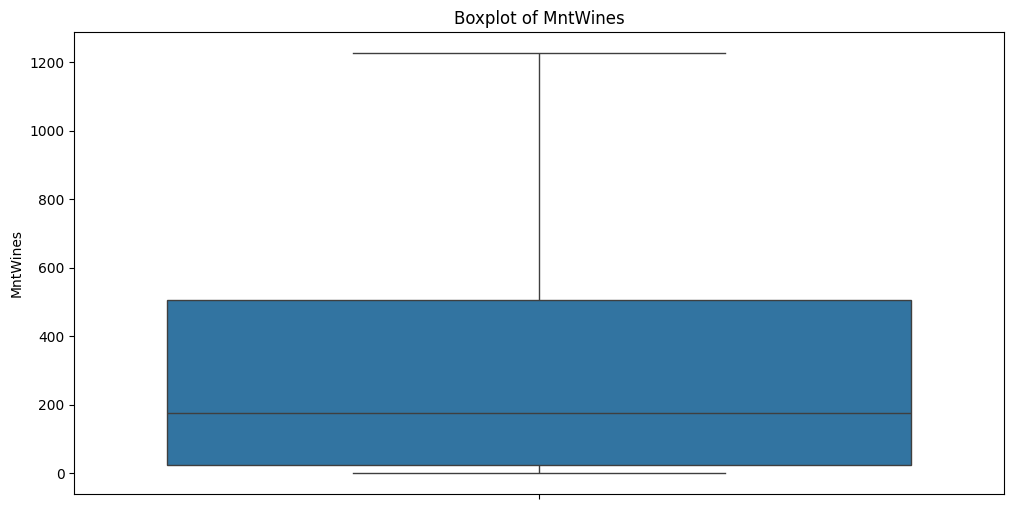

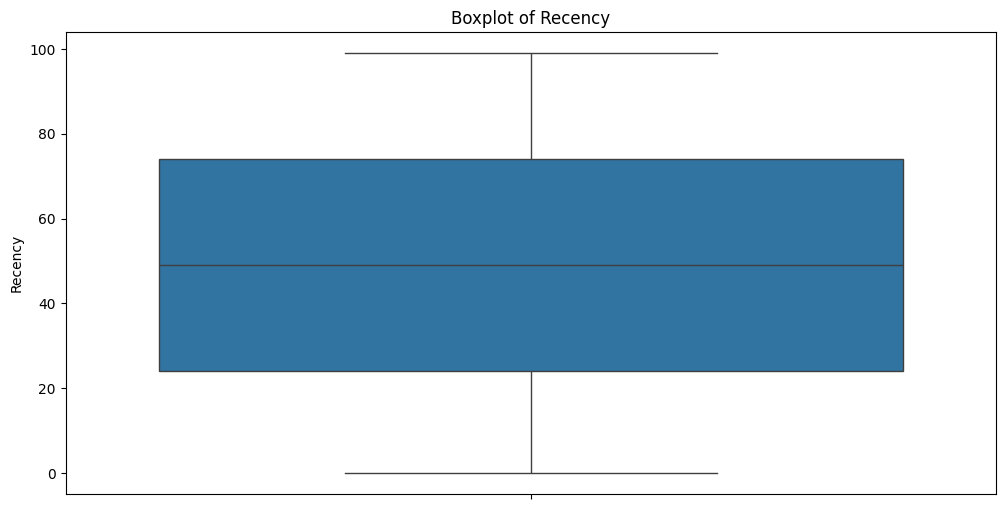

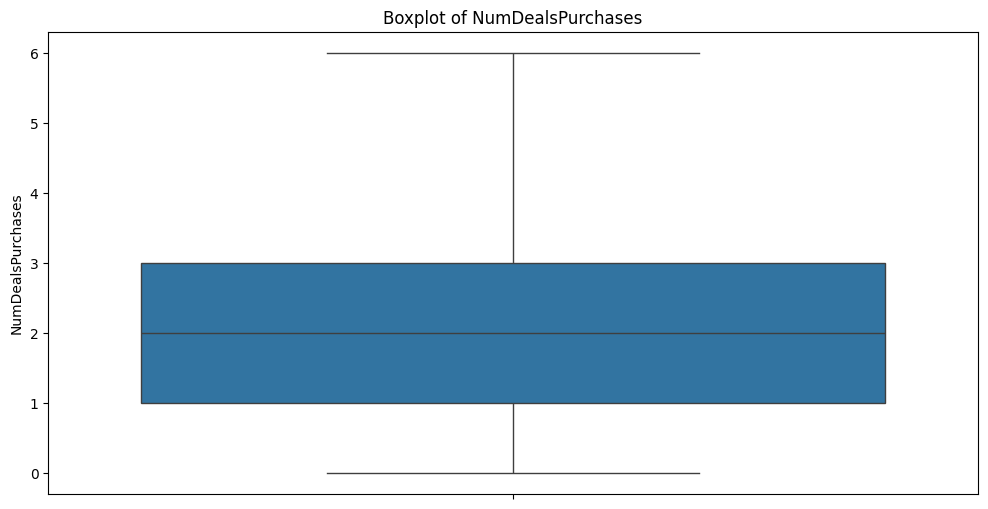

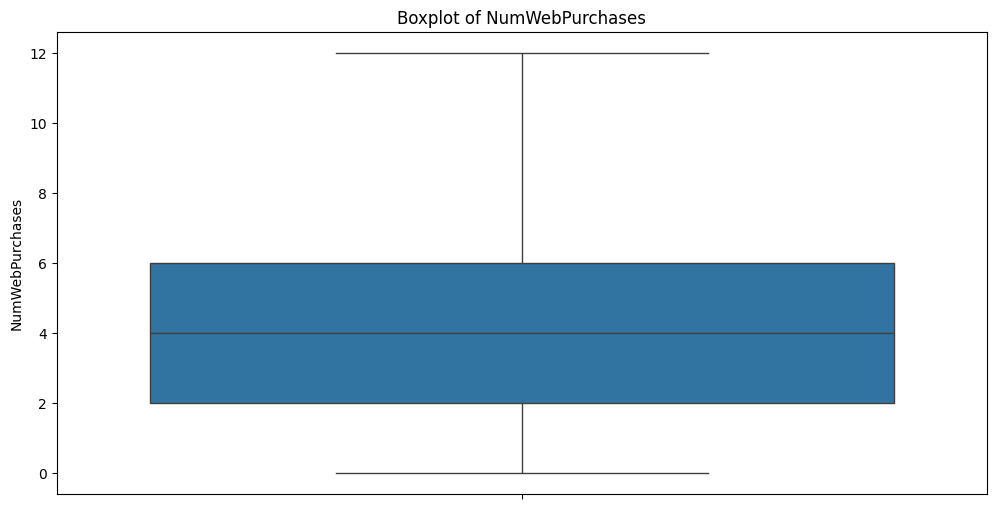

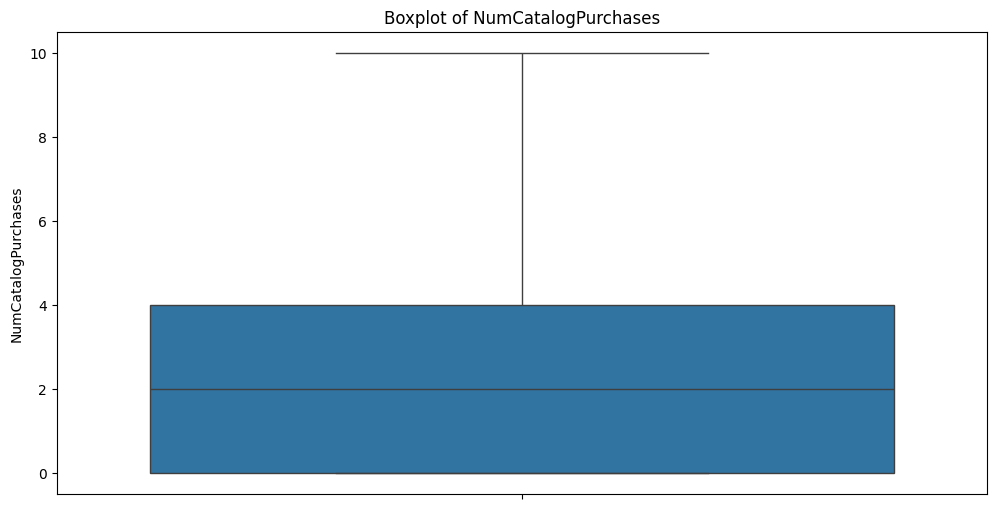

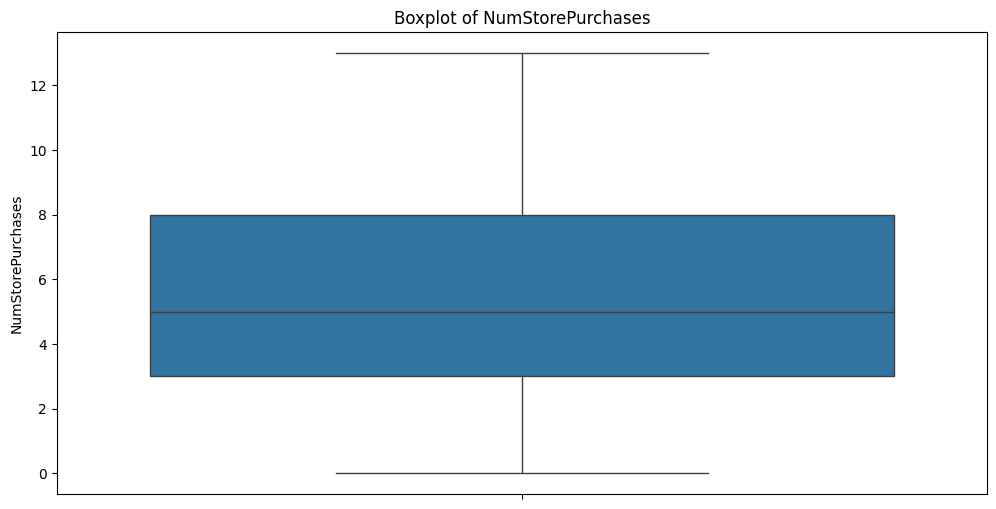

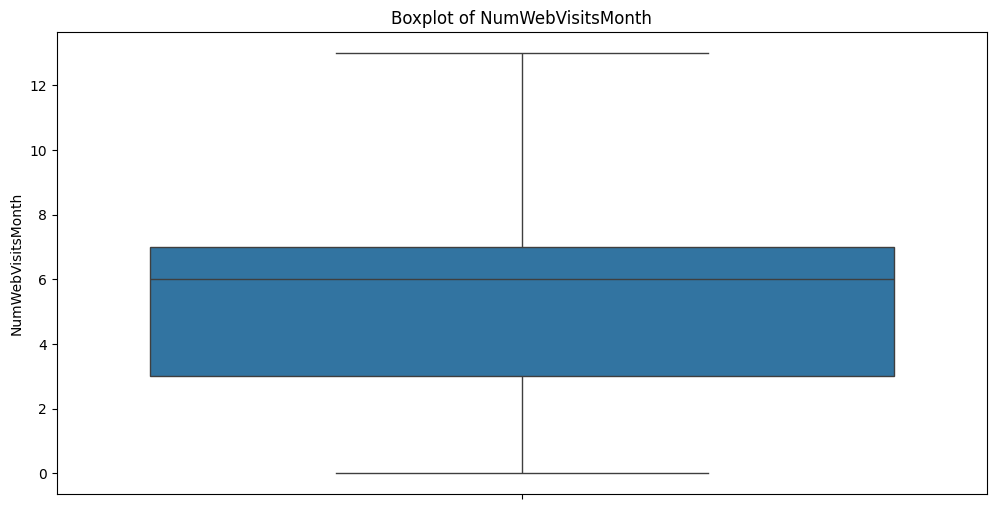

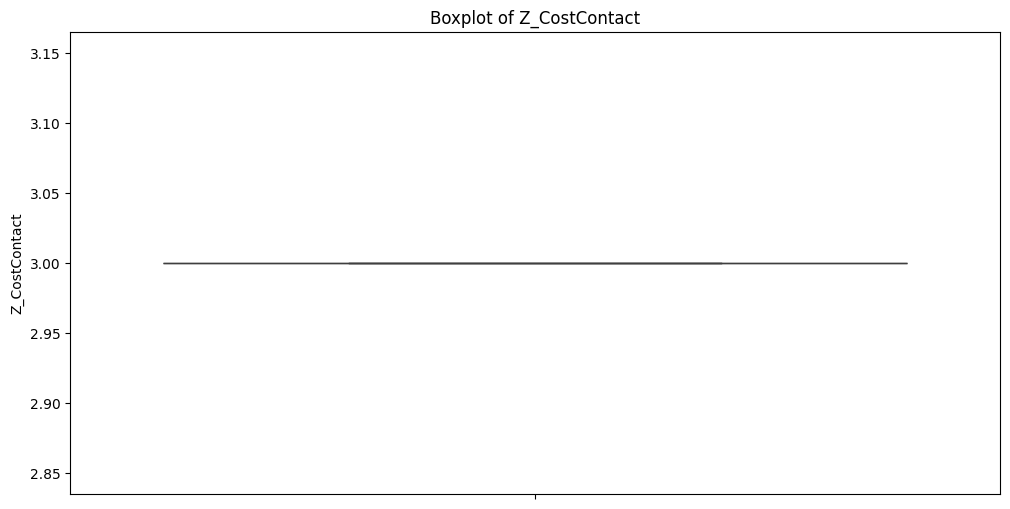

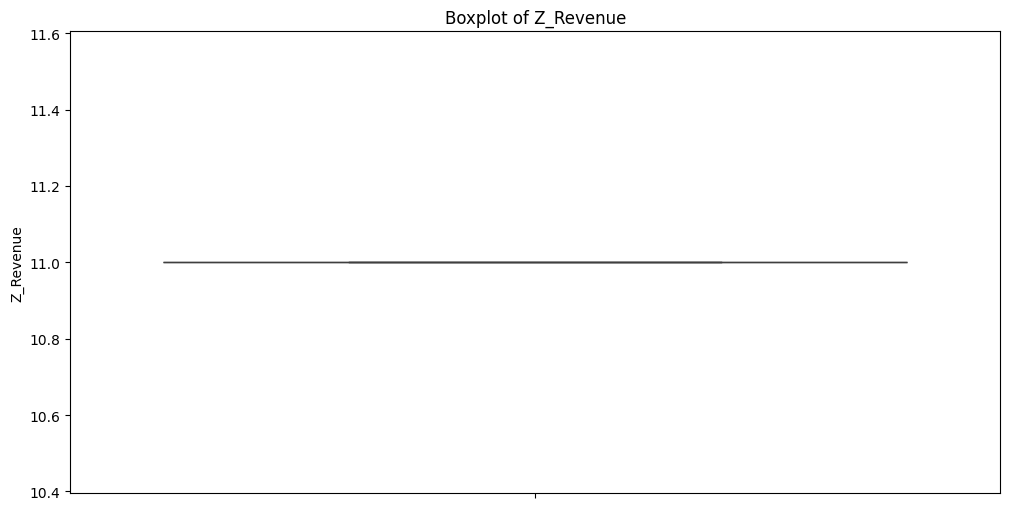

In [ ]:
# Verifying if all the outliers are treated

for feature in numerical_features:
  plt.figure(figsize=(12,6))
  sns.boxplot(df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [ ]:
# All the outliers in the numerical features have been treated using IQR method.

## Feature Engineering

In [ ]:
# We need to engineer following features to reduce dimensionality to some extent by combining some features together that are
# very similar in meaning in our context.

# 1. Create 'Total_Spent' feature that adds all the amount spent on various products over the last 2 years.

# 2. Create 'Age' feature from Year_Birth

# 3. Create only 2 categories of Marital_Status - 'Together' and 'Alone'

# 4. Create only 3 categories of Education - 'Undergraduate', 'Graduate' & 'Postgraduate'

# 5. Create feature 'Children' from combining Kids and Teen at home.

# 6. Create feature 'Family_Size' to show total number of people in home.

# 7. Remove unnecessary and redundant features.

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Age'] = 2025 - df['Year_Birth']

df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Together', 'Together':'Together', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone', 'Alone':'Alone'})

df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

df['Children'] = df['Kidhome'] + df['Teenhome']

df['Family_Size'] = df['Children'] + df['Marital_Status'].replace({'Alone': 1, 'Together': 2})

df.drop(columns=['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

df.head(10)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Age,Children,Family_Size
0,Graduate,Alone,58138.0,58.0,635.0,79.5,546.0,120.5,81.0,88.0,...,0,0,0,0,0,1,1550.0,68,0,1
1,Graduate,Alone,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,...,0,0,0,0,0,0,27.0,71,2,3
2,Graduate,Together,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,...,0,0,0,0,0,0,776.0,60,0,2
3,Graduate,Together,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,...,0,0,0,0,0,0,53.0,41,1,3
4,Postgraduate,Together,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,...,0,0,0,0,0,0,422.0,44,1,3
5,Postgraduate,Together,62513.0,16.0,520.0,42.0,98.0,0.0,42.0,14.0,...,0,0,0,0,0,0,716.0,58,1,3
6,Graduate,Alone,55635.0,34.0,235.0,65.0,164.0,50.0,49.0,27.0,...,0,0,0,0,0,0,590.0,54,1,2
7,Postgraduate,Together,33454.0,32.0,76.0,10.0,56.0,3.0,1.0,23.0,...,0,0,0,0,0,0,169.0,40,1,3
8,Postgraduate,Together,30351.0,19.0,14.0,0.0,24.0,3.0,3.0,2.0,...,0,0,0,0,0,1,46.0,51,1,3
9,Postgraduate,Together,5648.0,68.0,28.0,0.0,6.0,1.0,1.0,13.0,...,0,0,0,0,0,0,49.0,75,2,4


In [ ]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Age,Children,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,51874.493231,49.012635,303.272789,21.569043,151.268389,32.189079,21.950812,39.497518,2.216155,4.067690,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,569.747631,56.179603,0.947202,2.592509
std,21059.740890,28.948352,331.811951,26.923702,179.016404,40.411139,27.539044,39.874746,1.536238,2.645994,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,547.750639,11.985554,0.749062,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,29.000000,0.000000,1.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,48.000000,0.000000,2.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,395.750000,55.000000,1.000000,3.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,993.500000,66.000000,1.000000,3.000000
max,118350.500000,99.000000,1226.500000,79.500000,556.625000,120.500000,81.000000,126.500000,6.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2101.625000,132.000000,3.000000,5.000000


In [ ]:
# We can see max. Age is 132. We need to set a cap for maximum age by dropping the outliers for a realstic analysis.

df['Age'].value_counts()

,count
Age,
49,89
54,86
50,83
53,78
47,76
55,75
60,74
52,72
56,70


In [ ]:
# We can see there are only 3 values above 100. Therefore, we can drop these impractical 'Age' values from the dataset.

df = df[df['Age'] < 100]

In [ ]:
df.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Age,Children,Family_Size
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,51863.318120,49.007682,303.332354,21.559648,151.216053,32.179394,21.949842,39.481699,2.217804,4.070041,...,0.074108,0.072752,0.064166,0.013556,0.009038,0.150474,569.718990,56.082693,0.947582,2.593312
std,21060.030251,28.941864,331.781938,26.907837,178.877330,40.402598,27.536606,39.849704,1.536626,2.646618,...,0.262005,0.259788,0.245104,0.115666,0.094657,0.357617,547.379157,11.700216,0.749297,0.906073
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,29.000000,0.000000,1.000000
25%,35246.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,48.000000,0.000000,2.000000
50%,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,55.000000,1.000000,3.000000
75%,68487.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,66.000000,1.000000,3.000000
max,118350.500000,99.000000,1226.500000,79.500000,556.625000,120.500000,81.000000,126.500000,6.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2101.625000,85.000000,3.000000,5.000000


In [ ]:
# Now, we can see the Max. Age is 85 and total records have reduced down to 2213.

In [ ]:
# Reset the index after outlier removal
df.reset_index(drop=True, inplace=True)
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Age,Children,Family_Size
0,Graduate,Alone,58138.0,58.0,635.0,79.5,546.0,120.5,81.0,88.0,...,0,0,0,0,0,1,1550.0,68,0,1
1,Graduate,Alone,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,...,0,0,0,0,0,0,27.0,71,2,3
2,Graduate,Together,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,...,0,0,0,0,0,0,776.0,60,0,2
3,Graduate,Together,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,...,0,0,0,0,0,0,53.0,41,1,3
4,Postgraduate,Together,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,...,0,0,0,0,0,0,422.0,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,Graduate,Together,61223.0,46.0,709.0,43.0,182.0,42.0,81.0,126.5,...,0,0,0,0,0,0,1183.5,58,1,3
2209,Postgraduate,Together,64014.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,...,0,0,1,0,0,0,444.0,79,3,5
2210,Graduate,Alone,56981.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,...,1,0,0,0,0,0,1241.0,44,0,1
2211,Postgraduate,Together,69245.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,...,0,0,0,0,0,0,843.0,69,1,3


## Data Pre-Processing

In [ ]:
# Now, we will have to perform the following pre-processing steps:

# 1. Label Encode the categorical features

# 2. Scaling the features

# 3. Dimensionality Reduction

#### 1. Label Encoding

In [ ]:
# Label Encoding categorical features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_features = ['Education', 'Marital_Status']

for feature in categorical_features:
  df[feature] = le.fit_transform(df[feature])

df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spent,Age,Children,Family_Size
0,0,0,58138.0,58.0,635.0,79.5,546.0,120.5,81.0,88.0,...,0,0,0,0,0,1,1550.0,68,0,1
1,0,0,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,...,0,0,0,0,0,0,27.0,71,2,3
2,0,1,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,...,0,0,0,0,0,0,776.0,60,0,2
3,0,1,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,...,0,0,0,0,0,0,53.0,41,1,3
4,1,1,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,...,0,0,0,0,0,0,422.0,44,1,3


In [ ]:
# Now we have all the features in numeric (integer or float) datatype, which will be useful for clustering analysis.

In [ ]:
# Now, let's drop the features based on deals accepted, complain & response as they will not add any significant relevance
# for performing clustering.

df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response'], inplace=True)
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent,Age,Children,Family_Size
0,0,0,58138.0,58.0,635.0,79.5,546.0,120.5,81.0,88.0,3.0,8.0,10.0,4.0,7.0,1550.0,68,0,1
1,0,0,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,27.0,71,2,3
2,0,1,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,776.0,60,0,2
3,0,1,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,53.0,41,1,3
4,1,1,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,422.0,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,0,1,61223.0,46.0,709.0,43.0,182.0,42.0,81.0,126.5,2.0,9.0,3.0,4.0,5.0,1183.5,58,1,3
2209,1,1,64014.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,6.0,8.0,2.0,5.0,7.0,444.0,79,3,5
2210,0,0,56981.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,1241.0,44,0,1
2211,1,1,69245.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,843.0,69,1,3


#### 2. Feature Scaling

In [ ]:
# Clustering algorithms are very sensitive to the scale of the features, thus we need to perform feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
pd.DataFrame(df_scaled, columns=df.columns)

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent,Age,Children,Family_Size
0,-0.893223,-1.350076,0.298010,0.310773,0.999881,2.153776,2.207508,2.186507,2.144909,1.217807,0.509150,1.485234,2.692409,-0.555456,0.723104,1.791268,1.018785,-1.264914,-1.758879
1,-0.893223,-1.350076,-0.262135,-0.380424,-0.881297,-0.764249,-0.812003,-0.747136,-0.760972,-0.840389,-0.141774,-1.160249,-0.596845,-1.170837,-0.129669,-0.991710,1.275248,1.404857,0.448948
2,-0.893223,0.740699,0.937992,-0.795142,0.369807,1.020021,-0.135409,1.951321,-0.034502,0.063209,-0.792697,1.485234,-0.231372,1.290688,-0.556056,0.376937,0.334882,-1.264914,-0.654965
3,-0.893223,0.740699,-1.197672,-0.795142,-0.881297,-0.652732,-0.733719,-0.549084,-0.688325,-0.865489,-0.141774,-0.782322,-0.962318,-0.555456,0.296717,-0.944201,-1.289387,0.069971,0.448948
4,0.572087,0.740699,0.305372,1.554927,-0.392914,0.796987,-0.185734,0.342150,0.183439,-0.614490,1.810997,0.351456,0.134100,0.059925,-0.129669,-0.269927,-1.032923,0.069971,0.448948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,-0.893223,0.740699,0.444529,-0.103945,1.222970,0.796987,0.172134,0.243124,2.144909,2.184156,-0.141774,1.863160,0.134100,-0.555456,-0.129669,1.121562,0.163906,0.069971,0.448948
2209,0.572087,0.740699,0.577085,0.241653,0.309513,-0.801422,-0.677802,-0.796648,-0.797295,-0.790189,2.461920,1.485234,-0.231372,-0.247765,0.723104,-0.229726,1.959151,2.739742,2.656775
2210,-0.893223,-1.350076,0.243059,1.451248,1.822897,0.982849,0.367843,-0.004441,-0.361413,-0.388590,-0.792697,-0.782322,0.134100,2.213760,0.296717,1.226632,-1.032923,-1.264914,-1.758879
2211,0.572087,0.740699,0.825526,-1.417219,0.375837,0.313747,0.351068,1.183870,0.292410,0.540109,-0.141774,0.729382,0.865046,1.290688,-0.982443,0.499366,1.104272,0.069971,0.448948


#### 3. Dimensionality Reduction using PCA

In [ ]:
# Import & Initialize PCA

from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
# Fit and transform
principal_components = pca.fit_transform(df_scaled)

In [ ]:
# Explained Variance Ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.41487733, 0.52952904, 0.59871746, 0.65476626, 0.70968371,
       0.76119115, 0.80305514, 0.83981472, 0.86922863, 0.89497404,
       0.91738381, 0.93558332, 0.95298213, 0.96873881, 0.98120014,
       0.99231251, 1.        , 1.        , 1.        ])

In [ ]:
# We want to choose a number of components that capture a significant portion of the variance while reducing dimensionality.
# A common threshold is to aim for 95% explained variance.

# Looking at the array, we can see that 13 components explain approximately 95% of the variance (0.95298213).

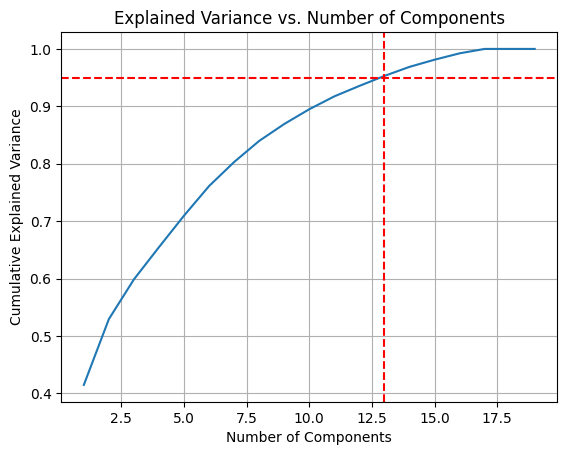

In [ ]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=13, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [ ]:
# Interpretation:

# 1. Steep initial increase: The first few components explain a significant portion of the variance.
# 2. Gradual leveling off: As we add more components, the increase in explained variance becomes smaller.
# 3. Elbow point (around 13-14 components): The curve starts to flatten out, suggesting that further components
#    contribute less significantly to the overall variance.

In [ ]:
# Taking n_components = 13 based on above conclusions

pca = PCA(n_components=13)
principal_components = pca.fit_transform(df_scaled)

In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,5.201313,-0.088732,-1.922889,-0.309537,-1.121129,-0.165478,-0.804669,1.457288,-0.957420,-2.336753,1.309969,0.303558,0.330828
1,-2.677962,-0.330567,-0.178190,1.899934,-0.873917,-1.304973,-0.753014,-0.538019,0.133657,-0.537047,-0.095810,0.088668,0.021483
2,2.469739,-0.165971,0.402545,-0.379462,0.110538,-1.119448,0.470476,1.018800,-1.031756,1.154224,-0.815842,0.233991,0.185168
3,-2.668078,-0.704302,0.593927,-1.276985,-0.220317,-0.945844,0.631945,-0.268713,-0.185083,0.414728,0.205460,-0.075465,-0.074380
4,-0.078969,1.035263,0.321417,-1.083635,-0.501901,1.752480,-0.671712,-0.568691,-0.620170,0.687217,0.994129,0.325128,0.817718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,2.471659,1.586344,0.089505,-1.088074,-0.689373,-0.446682,0.060271,1.207344,0.366930,-0.911754,-1.284978,0.745485,-0.030822
2209,-2.092458,4.776368,0.319992,1.595944,0.492498,0.256558,-0.456027,-0.464078,-0.460343,-0.383633,0.109593,0.696405,0.465596
2210,2.288137,-1.558558,-1.447562,0.120557,-1.037888,1.024951,1.665883,-1.158294,-0.587118,0.799420,-0.313515,-2.323810,-0.397964
2211,2.129224,1.061615,0.994192,0.502789,1.361729,-1.009679,-0.598563,0.333640,0.170910,0.505491,-0.170402,0.237756,-0.347305


## Clustering

#### K-Means Clustering

In [ ]:
# Import K-Means
from sklearn.cluster import KMeans

In [ ]:
# Calculate WCSS (Within Cluster Sum of Squares) for different number of clusters

wcss = []
for i in range(1,11): # Trying 1 to 10 clusters
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(pca_df)
  wcss.append(kmeans.inertia_)

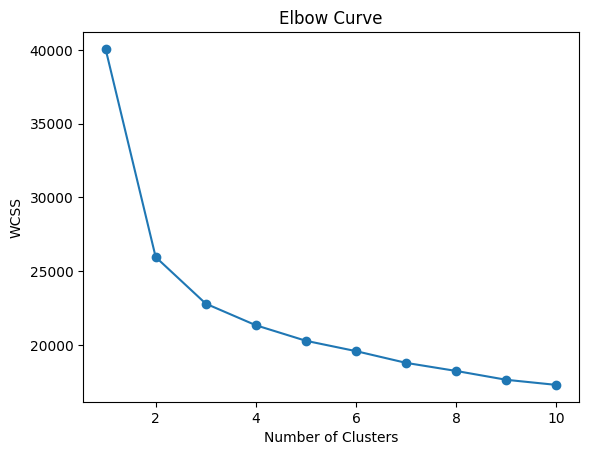

In [ ]:
# Elbow curve

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the above elbow graph, we can clearly see that the decrease in WCSS starts to slow down significantly
# from number of clusters = 4, denoting the elbow point on the graph, which represents the optimal number of clusters.

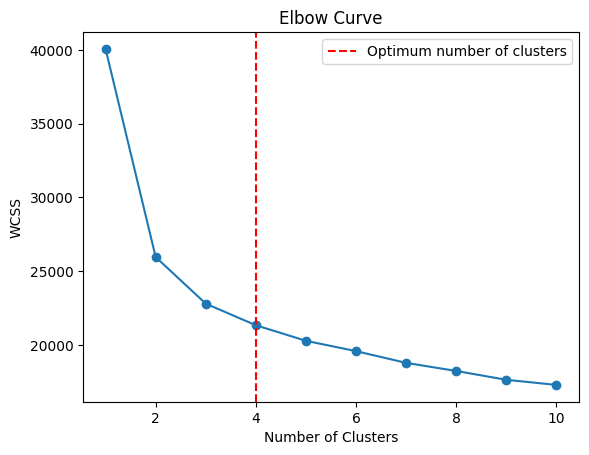

In [ ]:
# Visualizing the elbow point for better clarity

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=4, color='r', linestyle='--', label='Optimum number of clusters')
plt.legend()
plt.show()

In [ ]:
# Apply optimal number of clusters in KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Assign clusters to each data point

cluster_labels = kmeans.labels_

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels
df

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Spent,Age,Children,Family_Size,Cluster
0,0,0,58138.0,58.0,635.0,79.5,546.0,120.5,81.0,88.0,3.0,8.0,10.0,4.0,7.0,1550.0,68,0,1,0
1,0,0,46344.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,27.0,71,2,3,3
2,0,1,71613.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,776.0,60,0,2,0
3,0,1,26646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,53.0,41,1,3,2
4,1,1,58293.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,422.0,44,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,0,1,61223.0,46.0,709.0,43.0,182.0,42.0,81.0,126.5,2.0,9.0,3.0,4.0,5.0,1183.5,58,1,3,1
2209,1,1,64014.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,6.0,8.0,2.0,5.0,7.0,444.0,79,3,5,3
2210,0,0,56981.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,1241.0,44,0,1,0
2211,1,1,69245.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,843.0,69,1,3,1


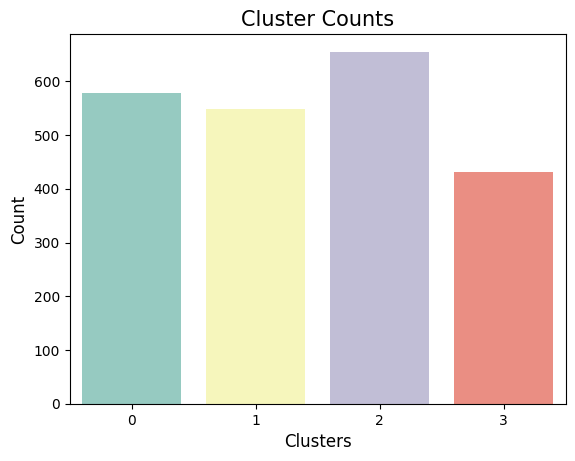

,count
Cluster,
2,655
0,579
1,548
3,431


In [ ]:
# View the counts of each cluster
sns.countplot(x='Cluster', data=df, palette='Set3')
plt.title('Cluster Counts', size=15)
plt.xlabel('Clusters', size=12)
plt.ylabel('Count', size=12)
plt.show()

df['Cluster'].value_counts()

In [ ]:
# The clusters seem to be fairly evenly distributed:

# 1. CLUSTER 0: Consists of 579 customers
# 2. CLUSTER 1: Consists of 548 customers
# 3. CLUSTER 2: Consists of 655 customers
# 4. CLUSTER 3: Consists of 431 customers

## Customer Segmentation

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Total_Spent', 'Age', 'Children', 'Family_Size', 'Cluster'],
      dtype='object')

Text(0.5, 1.0, 'Income V/s Spending Cluster')

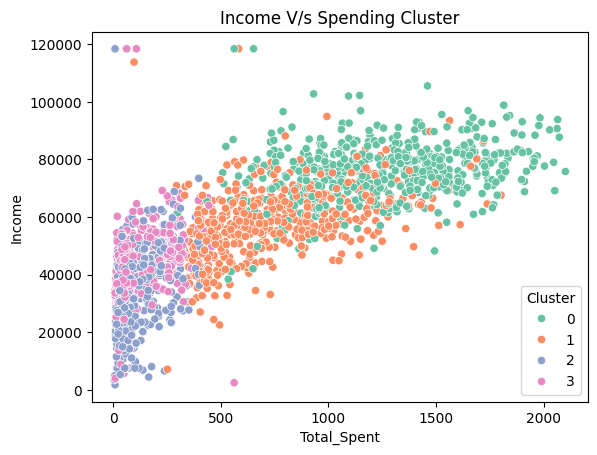

In [ ]:
sns.scatterplot(x='Total_Spent', y='Income', hue='Cluster', data=df, palette='Set2')
plt.title('Income V/s Spending Cluster')

#### Income V/s Spending Cluster Insights:

##### 1. Cluster 0: High Income & High Spending
##### 2. Cluster 1: Average Income & Average Spending
##### 3. Cluster 2: Low Income & Low Spending
##### 4. Cluster 3: Average Income & Low Spending

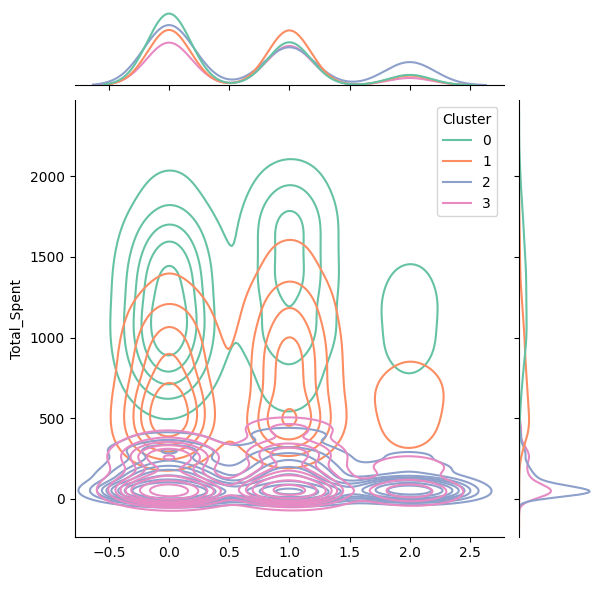

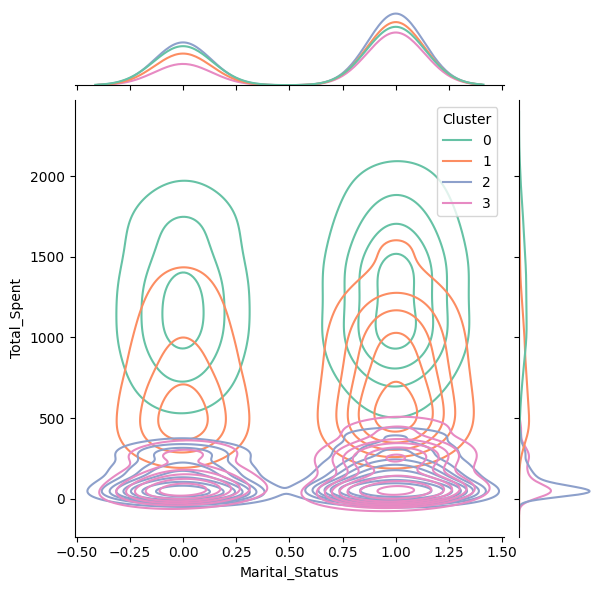

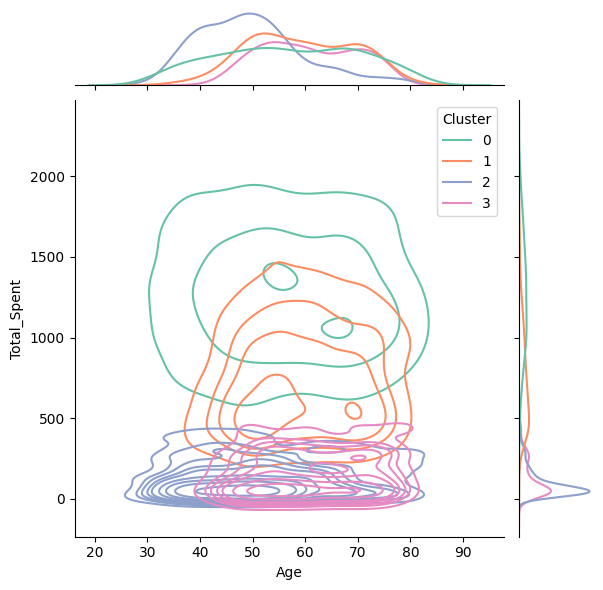

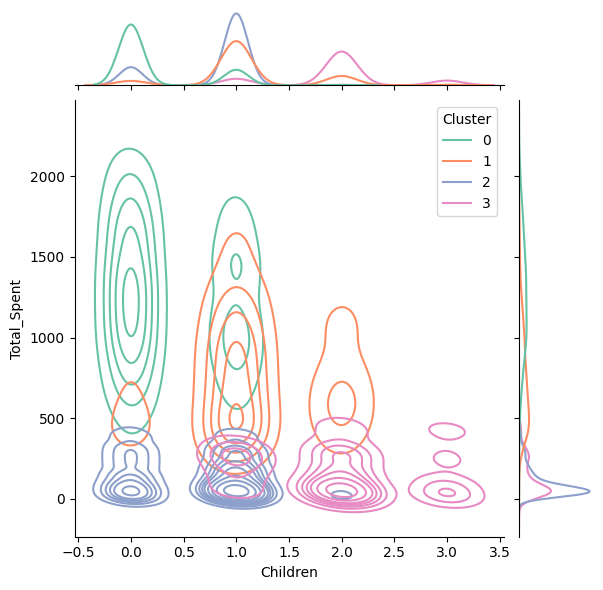

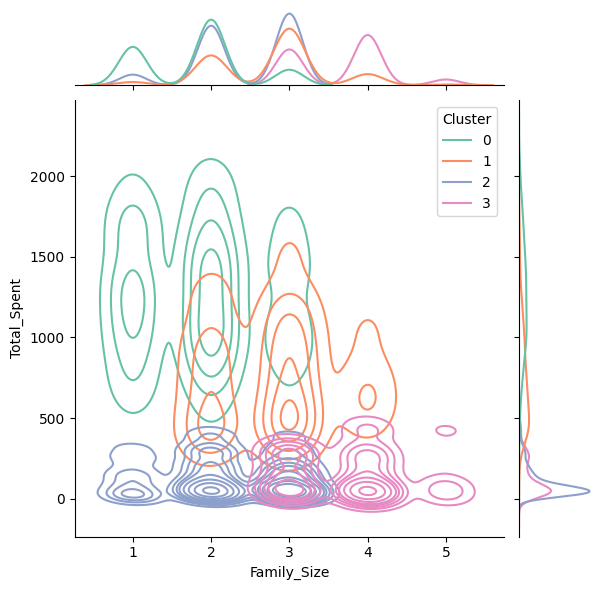

In [ ]:
customer_details = ['Education', 'Marital_Status', 'Age', 'Children', 'Family_Size']

for i in customer_details:
  sns.jointplot(x=df[i], y='Total_Spent', hue='Cluster', data=df, kind='kde', palette='Set2')

#### Total Spent V/s Customer Personal Details Insights:

##### CLUSTER 0:
##### 1. Education: Most of the customers are Graduate or PostGraduate.
##### 2. Children: Most of the customers have no children.
##### 3. Family Size: Most of the customers have a family size of 1 or 2.

##### CLUSTER 1:
##### 1. Education: Most of the customers are Graduate or PostGraduate.
##### 2. Children: Most of the customers have either 1 or 2 children.
##### 3. Family Size: Most of the customers have a family size of 2 or 3.

##### CLUSTER 2:
##### 1. Education: The customers are fairly distributed in equal numbers in all 3 categories - Undergraduate, Graduate & Postgraduate.
##### 2. Children: Most of the customers have 1 child or no children at all.
##### 3. Family Size: Most of the customers have a family size of 2 or 3.

##### CLUSTER 3:
##### 1. Education: Most of the customers are Graduate or PostGraduate.
##### 2. Children: Most of the customers have 2 or 3 children.
##### 3. Family Size: Most of the customers have a family size of 3 or 4.

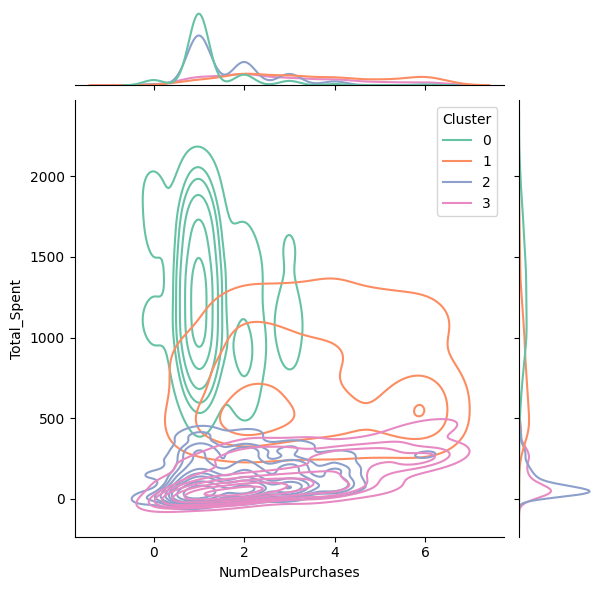

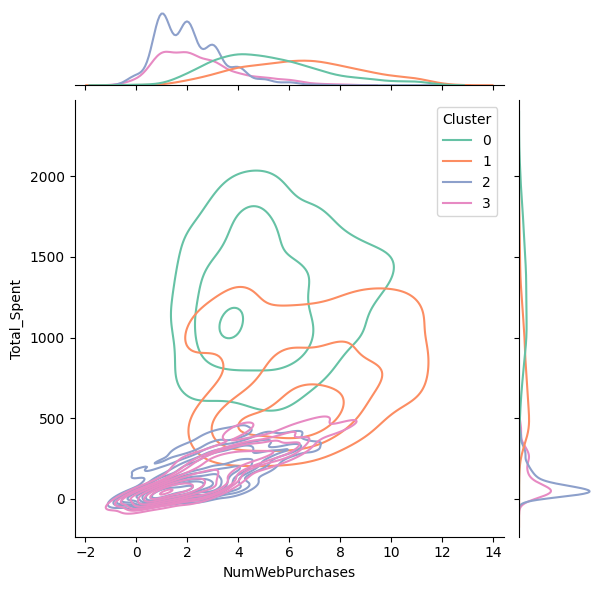

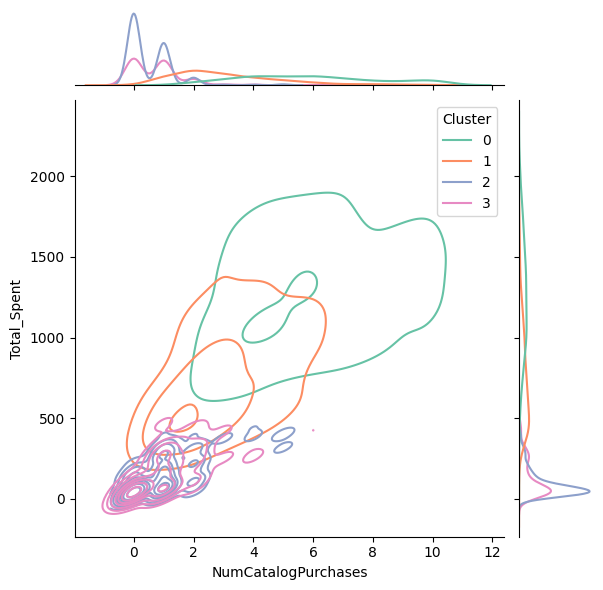

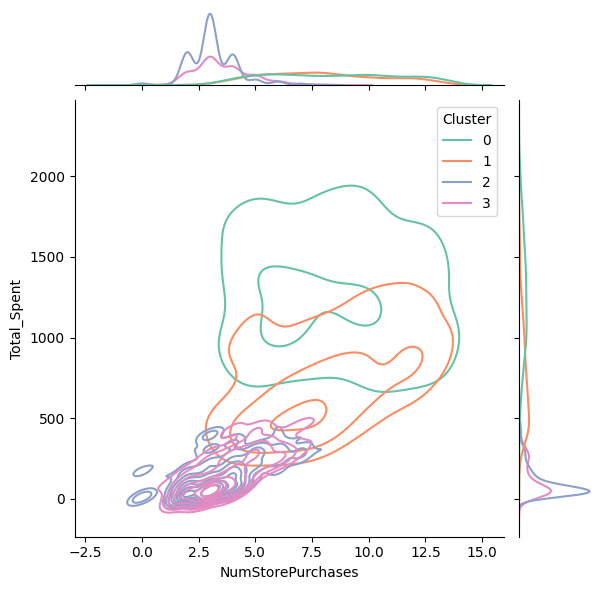

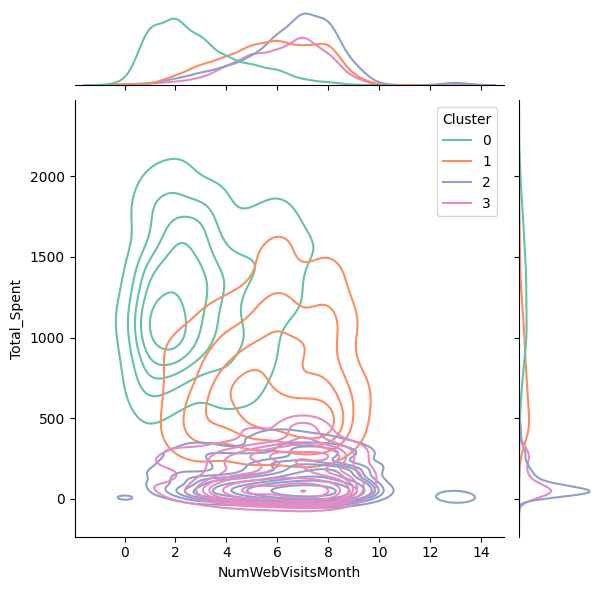

In [ ]:
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for i in purchases:
  sns.jointplot(x=df[i], y='Total_Spent', hue='Cluster', data=df, kind='kde', palette='Set2')

#### Total Spent V/s Number of Purchases Insights:

#### CLUSTER 0:
##### 1. Number of purchases made with a discount: Range between (0 - 2).
##### 2. Number of purchases made through the company's website: Range between (2 - 10).
##### 3. Number of purchases made using a catalogue: Range between (2 - 10).
##### 4. Number of purchases made directly in stores: Range between (4 - 14).
##### 5. Number of visits to company's website in the last month: Range between (0 - 6).

#### CLUSTER 1:
##### 1. Number of purchases made with a discount: Range between (0 - 7).
##### 2. Number of purchases made through the company's website: Range between (2 - 12).
##### 3. Number of purchases made using a catalogue: Range between (0 - 6).
##### 4. Number of purchases made directly in stores: Range between (3 - 14).
##### 5. Number of visits to company's website in the last month: Range between (2 - 10).

#### CLUSTER 2:
##### 1. Number of purchases made with a discount: Range between (0 - 4).
##### 2. Number of purchases made through the company's website: Range between (0 - 6).
##### 3. Number of purchases made using a catalogue: Range between (0 - 2).
##### 4. Number of purchases made directly in stores: Range between (0 - 7).
##### 5. Number of visits to company's website in the last month: Range between (1 - 11).

#### CLUSTER 3:
##### 1. Number of purchases made with a discount: Range between (0 - 6).
##### 2. Number of purchases made through the company's website: Range between (0 - 7).
##### 3. Number of purchases made using a catalogue: Range between (0 - 2).
##### 4. Number of purchases made directly in stores: Range between (1 - 7).
##### 5. Number of visits to company's website in the last month: Range between (2 - 10).

## Model Deployment

In [ ]:
# Import necessary library
import joblib

In [ ]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [ ]:
joblib.dump(le, 'education_label_encoder.pkl')
joblib.dump(le, 'marital_status_label_encoder.pkl')

['marital_status_label_encoder.pkl']

In [ ]:
joblib.dump(scaler, 'scaler_model.pkl')

['scaler_model.pkl']